In [14]:
import statsmodels.formula.api as smf
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np
import math
import re
 
def rename(text): return re.sub(r'[^a-zA-Z]', "", text)

def perform_groupwise_shapiro_wilk_test(dataframe, numerical_columns, group_column):
    if len(numerical_columns) == 0: raise ValueError("No numerical columns provided for testing.")
    
    renamed_columns = {col: rename(col) for col in dataframe.columns}
    dataframe = dataframe.rename(columns=renamed_columns)
    renamed_group_column = rename(group_column)

    test_results = []
    for original_col in numerical_columns:
        renamed_col = rename(original_col)
        formula = f"{renamed_col} ~ C({renamed_group_column})"
        model = smf.ols(formula, data=dataframe).fit()
        residuals = model.resid

        stat, p_value = shapiro(residuals)
        test_results.append({
            'Group': group_column,
            'Variable': original_col,
            'Statistic': stat,
            'P-Value': p_value,
            'Normality': 'Normally Distributed' if p_value > 0.05 else 'Not Normally Distributed'
        })

    results_df = pd.DataFrame(test_results)
    return results_df

filepath = "../Datasets/Eggplant Fusarium Fertilizer Data.csv"
df = pd.read_csv(filepath)

numerical_columns = df.select_dtypes(include=[np.number]).columns
shapiro_test_results = perform_groupwise_shapiro_wilk_test(df, numerical_columns, group_column='Variety')
display(shapiro_test_results)

,Group,Variable,Statistic,P-Value,Normality
0,Variety,Replication ID,0.954508,5.066848e-15,Not Normally Distributed
1,Variety,Infection Severity (%),0.990016,2.952301e-05,Not Normally Distributed
2,Variety,Wilt index,0.994169,3.497478e-03,Not Normally Distributed
3,Variety,Plant height (cm),0.998424,6.959895e-01,Normally Distributed
4,Variety,Days to wilt symptoms,0.983071,5.418148e-08,Not Normally Distributed
5,Variety,Survival rate (%),0.994685,6.757966e-03,Not Normally Distributed
6,Variety,Disease incidence (%),0.998209,5.792315e-01,Normally Distributed


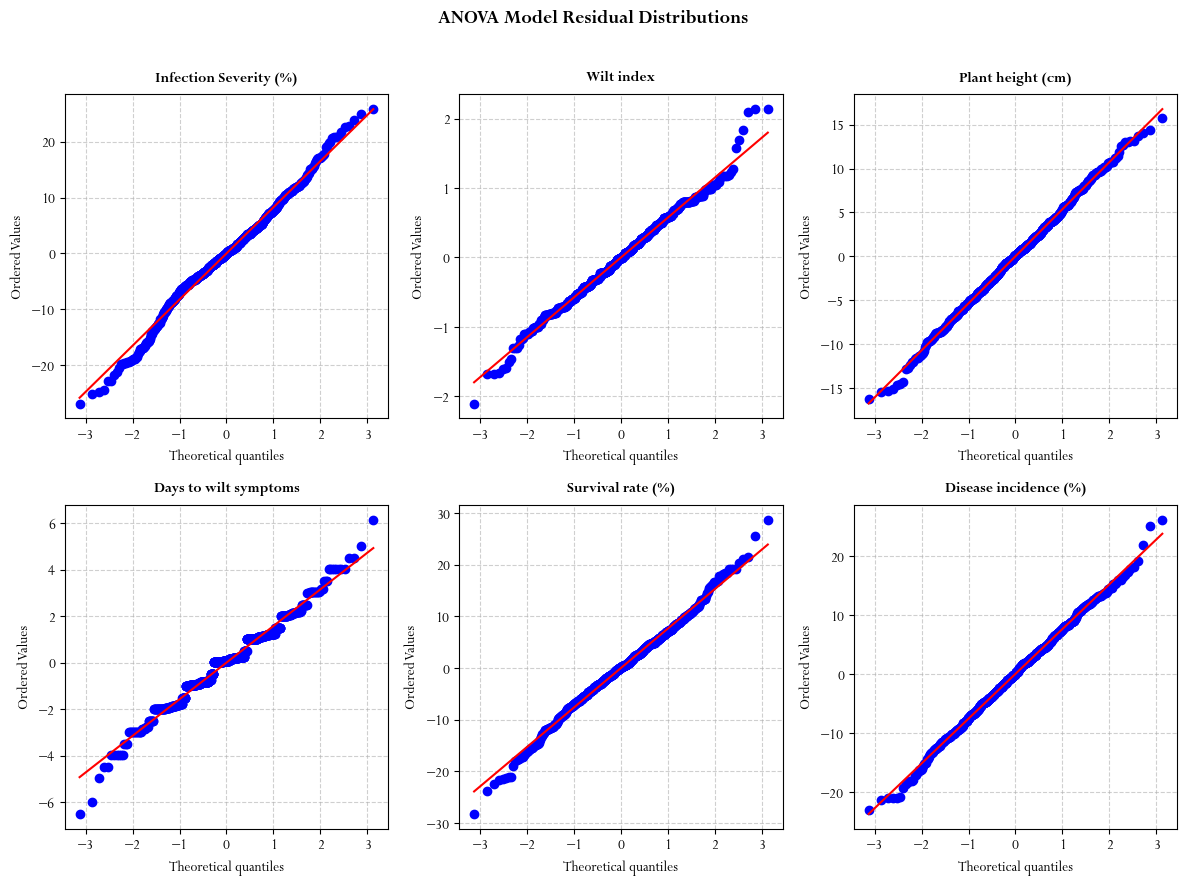

In [17]:
# Normality of Residual Using Q-Q plot
def residual_qqplot(data, Metrics, group_col):
    renamed_group_col = rename(group_col)
    data = data.rename(columns={col: rename(col) for col in data.columns})
    
    num_variables = len(Metrics)
    rows = math.ceil(num_variables / 3)
    cols = min(num_variables, 3)
    
    fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4.5* rows))
    plt.rcParams.update({'font.family': 'Perpetua', 'font.style': 'normal', 'font.size': 11 })
    fig.suptitle("ANOVA Model Residual Distributions", fontsize=14, fontweight='bold')
    axes = axes.flatten() if num_variables > 1 else [axes]
    
    for idx, column in enumerate(Metrics):
        ax = axes[idx]
        column_name = rename(column)  
        formula = f"{column_name} ~ C({renamed_group_col})" 
        model = smf.ols(formula, data=data).fit()
        
        #sm. qqplot(model.resid, line='s', ax=ax)
        stats.probplot(model.resid, dist="norm", plot=ax)
        axes[idx].set_title(f"{column} Distributions", fontsize=11, pad=10, fontweight='bold')
        if group_col: axes[idx].set_title(f"{column}", fontsize=11, pad=10, fontweight='bold')
        axes[idx].grid(linestyle='--', alpha=0.6)
    
    for idx in range(num_variables, len(axes)):
        fig.delaxes(axes[idx])
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()
    
Metrics = ['Infection Severity (%)', 'Wilt index', 'Plant height (cm)', 'Days to wilt symptoms', 'Survival rate (%)', 'Disease incidence (%)']
residual_qqplot(df, Metrics, group_col='Variety')

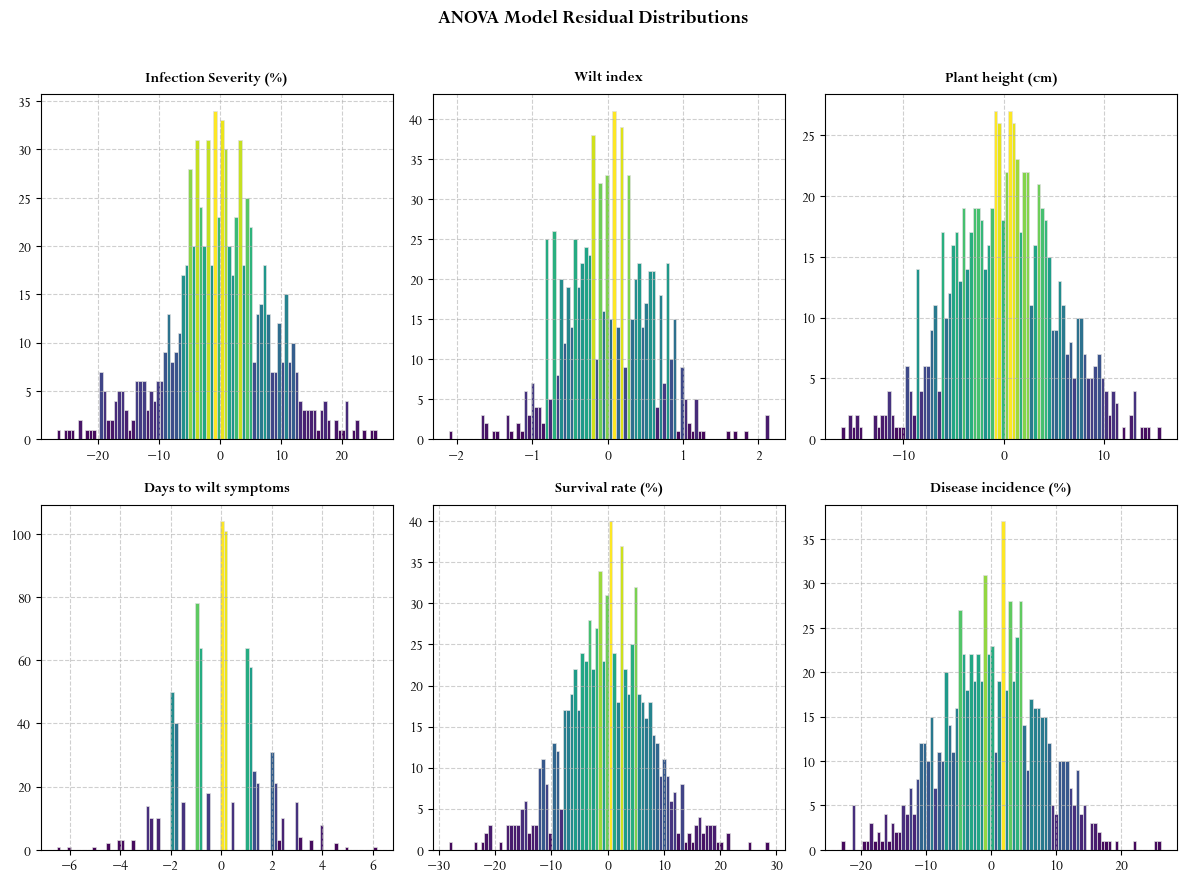

In [31]:
# Normality of Residual Using Histplot
def residual_histoplot(data, Metrics, group_col):
    renamed_group_col = rename(group_col)
    data = data.rename(columns={col: rename(col) for col in data.columns})
    
    num_variables = len(Metrics)
    rows = math.ceil(num_variables / 3)
    cols = min(num_variables, 3)
    
    fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4.5* rows))
    plt.rcParams.update({'font.family': 'Perpetua', 'font.style': 'normal', 'font.size': 11 })
    fig.suptitle("ANOVA Model Residual Distributions", fontsize=14, fontweight='bold')
    axes = axes.flatten() if num_variables > 1 else [axes]
    
    for idx, column in enumerate(Metrics):
        ax = axes[idx]
        column_name = rename(column)  
        formula = f"{column_name} ~ C({renamed_group_col})" 
        model = smf.ols(formula, data=data).fit()
        n, bins, patches = ax.hist(model.resid, bins=90, edgecolor='#e0e0e0', linewidth=0.5, alpha=1)
        for i in range(len(patches)): 
            patches[i].set_facecolor(plt.cm.viridis(n[i] / max(n)))
        axes[idx].set_title(f"{column} Distributions", fontsize=11, pad=10, fontweight='bold')
        if group_col: axes[idx].set_title(f"{column}", fontsize=11, pad=10, fontweight='bold')
        axes[idx].grid(linestyle='--', alpha=0.6)
    
    for idx in range(num_variables, len(axes)):
        fig.delaxes(axes[idx])
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()
    
Metrics = ['Infection Severity (%)', 'Wilt index', 'Plant height (cm)', 'Days to wilt symptoms', 'Survival rate (%)', 'Disease incidence (%)']
residual_histoplot(df, Metrics, group_col='Variety')